<a href="https://colab.research.google.com/github/mozaloom/Dog-vs-Cat-Classification-using-VGG16/blob/main/DL_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Classification using pre-trained model
Done By:
Mohammed Zaloom | Mohammed Hasweh | Yousef Al-helo

# Importing what we need

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np


# Loading the pre-trained VGG16 model

In [4]:
VGG16_model = VGG16(weights='imagenet', include_top=False, input_shape=(230, 230, 3))


58889256/58889256 [==============================] - 0s 0us/step


#  Adding new layers on top of the pre-trained model


In [5]:
model = Sequential()
model.add(VGG16_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


# Freezing the early layers of the pre-trained model


In [6]:
for layer in VGG16_model.layers:
    layer.trainable = False


# Compile the model

In [7]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


# Importing drive because our dataset

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data preprocessing and augmentation


In [9]:

train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=21, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.3, zoom_range=0.3, horizontal_flip=True, fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/TL/cat_v_dog_predict.v4i.folder/train', target_size=(230, 230), batch_size=32, class_mode='binary')

validation_generator = validation_datagen.flow_from_directory('/content/drive/MyDrive/TL/cat_v_dog_predict.v4i.folder/valid', target_size=(230, 230), batch_size=32, class_mode='binary')



Found 594 images belonging to 2 classes.
Found 196 images belonging to 2 classes.


# Train the model


In [10]:
model.fit(train_generator, steps_per_epoch=len(train_generator), validation_data=validation_generator, validation_steps=len(validation_generator), epochs=100)

Epoch 1/100
19/19 [==============================] - 119s 6s/step - loss: 2.1096 - accuracy: 0.4697 - val_loss: 0.5284 - val_accuracy: 0.6582
Epoch 2/100
19/19 [==============================] - 10s 539ms/step - loss: 0.6467 - accuracy: 0.6027 - val_loss: 0.4203 - val_accuracy: 0.9286
Epoch 3/100
19/19 [==============================] - 12s 595ms/step - loss: 0.5675 - accuracy: 0.6953 - val_loss: 0.3332 - val_accuracy: 0.9286
Epoch 4/100
19/19 [==============================] - 12s 652ms/step - loss: 0.5163 - accuracy: 0.7542 - val_loss: 0.2460 - val_accuracy: 0.9337
Epoch 5/100
19/19 [==============================] - 11s 574ms/step - loss: 0.5284 - accuracy: 0.7256 - val_loss: 0.2224 - val_accuracy: 0.9541
Epoch 6/100
19/19 [==============================] - 12s 652ms/step - loss: 0.4878 - accuracy: 0.7643 - val_loss: 0.1822 - val_accuracy: 0.9694
Epoch 7/100
19/19 [==============================] - 11s 589ms/step - loss: 0.4809 - accuracy: 0.7424 - val_loss: 0.1759 - val_accuracy: 0

# Saving the model

In [24]:
model.save('transferlearning.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Evaluation & Testing

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def imshow(img):
    img = mpimg.imread(img)
    imgplot = plt.imshow(img)
    plt.show()


1/1 [==============================] - 0s 19ms/step
Predicted: Dog


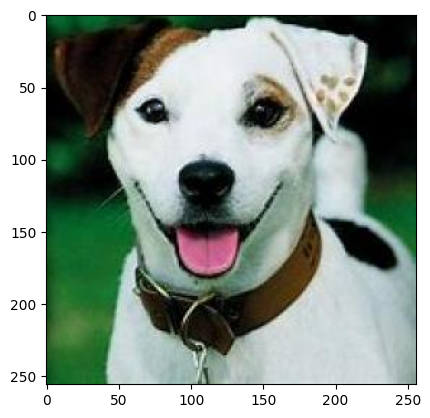

In [26]:
img_path = '/content/drive/MyDrive/TL/cat_v_dog_predict.v4i.folder/test/dogs/004_jpg.rf.bdbf13ca142152cb6d0aea3db8db0a1e.jpg'
img = image.load_img(img_path, target_size=(230, 230))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

predictions = model.predict(img_array)
if predictions[0][0] > 0.5:
    print("Predicted: Dog")
    imshow(img_path)
else:
    print("Predicted: Cat")
    imshow(img_path)

1/1 [==============================] - 0s 19ms/step
Predicted: Dog


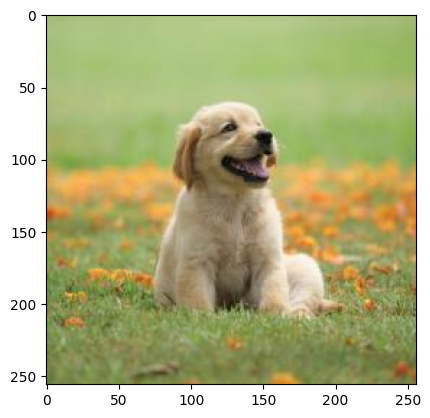

In [27]:

img_path = '/content/drive/MyDrive/TL/cat_v_dog_predict.v4i.folder/test/dogs/006_jpg.rf.9a3bc43ebeb12af75ecb19f30794d96a.jpg'
img = image.load_img(img_path, target_size=(230, 230))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# predictions
predictions = model.predict(img_array)
if predictions[0][0] > 0.5:
    print("Predicted: Dog")
    imshow(img_path)
else:
    print("Predicted: Cat")
    imshow(img_path)

1/1 [==============================] - 0s 32ms/step
Predicted: Cat


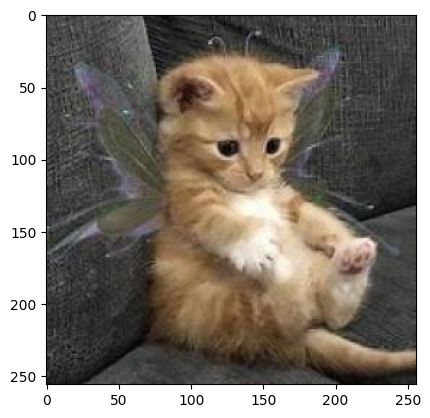

In [28]:
img_path = '/content/drive/MyDrive/TL/cat_v_dog_predict.v4i.folder/test/cats/003_jpg.rf.0c25ddab5abeb80282bb9dcb76e06279.jpg'
img = image.load_img(img_path, target_size=(230, 230))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

predictions = model.predict(img_array)
if predictions[0][0] > 0.5:
    print("Predicted: Dog")
    imshow(img_path)
else:
    print("Predicted: Cat")
    imshow(img_path)

1/1 [==============================] - 0s 131ms/step
Predicted: Cat


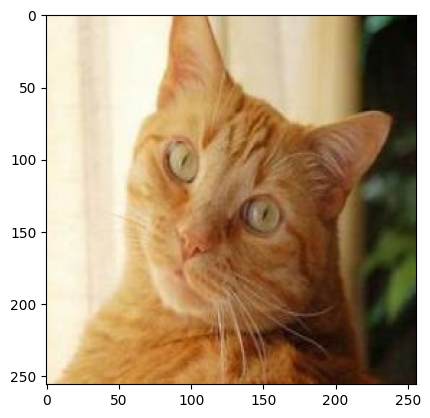

In [29]:
img_path = '/content/drive/MyDrive/TL/cat_v_dog_predict.v4i.folder/test/cats/002_jpg.rf.d7e6990bc6c735013c0ab6f60c798cc4.jpg'
img = image.load_img(img_path, target_size=(230, 230))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

predictions = model.predict(img_array)
if predictions[0][0] > 0.5:
    print("Predicted: Dog")
    imshow(img_path)
else:
    print("Predicted: Cat")
    imshow(img_path)